In [136]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.figure import Figure
import typing as tp

In [137]:
df = pd.read_csv('RUvideos_short.csv', sep=',', parse_dates=['trending_date'], dayfirst=True)
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['trending_date'] = pd.to_datetime(df.trending_date)
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,gDuslQ9avLc,2017-11-14,Захар и Полина учатся экономить,Т—Ж БОГАЧ,22,2017-11-13T09:09:31.000Z,"захар и полина|""учимся экономить""|""копить день...",62408,334,190,50,https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg,False,False,False,"Знакомьтесь, это Захар и Полина. Вместе с ними..."
1,AOCJIFEA_jE,2017-11-14,Биржа Мемов #29. Большой выпуск,Druzhko Show,22,2017-11-13T17:32:11.000Z,"биржа мемов|""лев шагинян""|""мемы""|""пикчи""|""друж...",330043,43841,2244,2977,https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg,False,False,False,"В 29 выпуске Дружко Шоу Сергей сказал, что Бир..."
2,VAWNQDgwwOM,2017-11-14,ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ,Юлик,24,2017-11-13T16:11:31.000Z,"юмор|""комедия""|""влог""|""блог""|""смешно""|""смешное...",424596,49854,714,2944,https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg,False,False,False,http://kapitany.ru/!Yulik.cap - Факультет #Кап...
3,gknkFwKQfHg,2017-11-14,Сочная кесадилья с курицей,Hochland,22,2017-11-13T06:51:10.000Z,"хохланд|""сыр""|""рецепты""|""как приготовить""|""вку...",112851,3566,122,80,https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg,False,False,False,*** как готовить ресторанные блюда дома
4,3sYvZcwzZr8,2017-11-14,КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ,Совергон,24,2017-11-13T16:52:36.000Z,"Совергон|""Sovergon""|""клипы""|""родители""|""школа""...",243469,36216,631,1692,https://i.ytimg.com/vi/3sYvZcwzZr8/default.jpg,False,False,False,❏ КОНКУРС КАПИТАНЫ: http://kapitany.ru/!Soverg...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,jH557u8P57g,2017-11-21,Жучков ГИБДД ЮЗАО. Операция не трезвый водител...,Геннадий Азаров,2,2017-11-20T09:19:25.000Z,"гибдд|""ДПС""|""ГАИ""|""МВД""|""УВД""|""ППС""|""мИЛИЦИЯ""|...",5498,373,19,49,https://i.ytimg.com/vi/jH557u8P57g/default.jpg,False,False,False,Одноклассники: https://ok.ru/gena.azarov\nТв...
1596,o_Go4duksR4,2017-11-21,КИТАЙСКИЙ ФАВОРИТ/FAW BESTURN X80/БОЛЬШОЙ ТЕСТ...,Большой тест-драйв,2,2017-11-20T15:14:31.000Z,"стиллавин|""вахидов""|""авто""|""машины""|""тест""|""ав...",40394,1339,179,201,https://i.ytimg.com/vi/o_Go4duksR4/default.jpg,False,False,False,Подписка на канал - http://www.youtube.com/use...
1597,jpT9k4G350Y,2017-11-21,Россия - Запад. Что хотят? - Полный Альбац 20 ...,РОССИЯ ЗАВТРА,25,2017-11-20T18:16:49.000Z,"Альбац|""20 ноября 2017""|""Эхо Москвы""",3516,65,7,4,https://i.ytimg.com/vi/jpT9k4G350Y/default.jpg,False,False,False,Россия - Запад. Что хотят? - Полный Альбац 20 ...
1598,KlOgfgGlAJM,2017-11-21,О невинно погибиших солдатах Вермахта (Руслан ...,PolitRussia,25,2017-11-20T11:09:04.000Z,"осташко|""пятиминутка""|""школьник""|""новый уренго...",47507,4372,231,2380,https://i.ytimg.com/vi/KlOgfgGlAJM/default.jpg,False,False,False,Не мог не высказаться по поводу выступления шк...


In [138]:
df.drop(columns=['video_id', 'title', 'channel_title', 'tags', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description', 'publish_time'], inplace=True)
df['trending_date'] = df['trending_date'].dt.day

df.head()

,trending_date,category_id,views,likes,dislikes,comment_count
0,14,22,62408,334,190,50
1,14,22,330043,43841,2244,2977
2,14,24,424596,49854,714,2944
3,14,22,112851,3566,122,80
4,14,24,243469,36216,631,1692


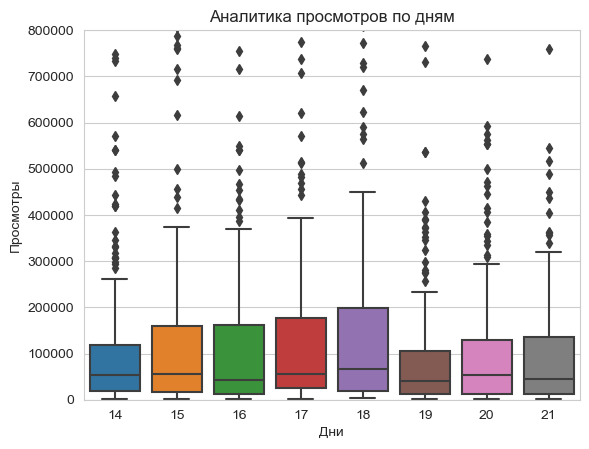

In [139]:
with sns.axes_style('whitegrid'):
    sns.boxplot(data=df, y='views', x='trending_date')
    plt.ylim((-5, 800000))
    plt.xlabel('Дни')
    plt.ylabel('Просмотры')
    plt.title('Аналитика просмотров по дням')

/var/folders/1w/v_pdz1hx607dnqpw4pt35zlm0000gn/T/ipykernel_19349/3739315549.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df = df[df['views'] < 300000][df['likes'] < 10000]


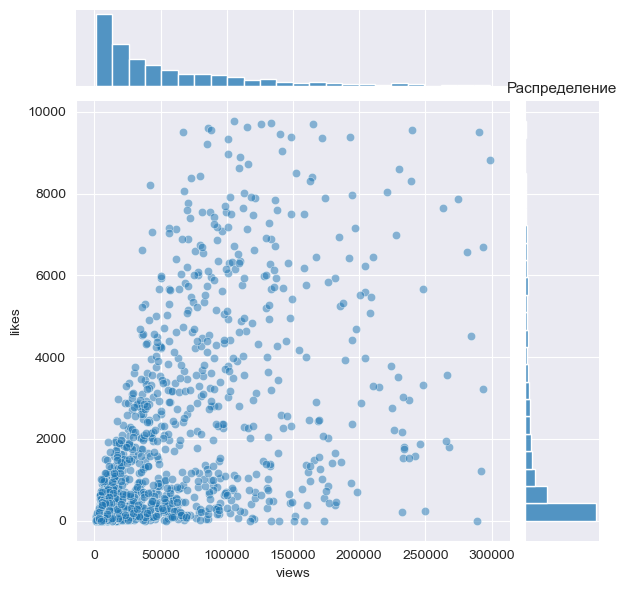

In [140]:
with sns.axes_style('darkgrid'):
    new_df = df[df['views'] < 300000][df['likes'] < 10000]
    sns.jointplot(data=new_df, x='views', y='likes', alpha=0.5)
    plt.title('Распределение', fontsize=11, loc='center')
    plt.xlabel('Просмотры')
    plt.ylabel('Лайки')